# Storage-X figures

This Jupyter notebook recreates the figures used in the paper **_"Cost and efficiency requirements for a successful electricity storage in a highly renewable European energy system"_**.  

The figures are created with different Python functions, loaded in the following, of which most of them points to the same file "sspace_w_sectorcoupling_wo_duplicates.csv". The .csv file contains the storage-X specific results from the optimization (optimal capacity, corresponding battery and backup capacity, renewable curtailment, system cost, etc.) for the 724 investigated samples. 

The notebook and the inherent Python functions are produced based on the modules versions listed in the file "environment.yml"

In every function, the system composition can be changed from including only the power sector to also integrating with other energy-consuming sectors:
- '0' (referred to as "SC1" in the manuscript. It does only represent the electricity system)
- 'T-H' (referred to as "SC2" in the manuscript. The system includes the energy demand in the land transport and heating sectors.)
- 'T-H-I-B' (referred to as "SC3" in the manuscript. The system includes the energy demand in the land transport, shipping, aviation, heating, and it allows usage of biomass supply.)

Import useful packages:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Standardize figure layout:

In [2]:
tech_colors_path = 'scripts/tech_colors.yaml'

fs = 18
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.fontsize'] = fs
plt.rcParams['legend.title_fontsize'] = fs

with open(tech_colors_path) as file:
    tech_colors = yaml.safe_load(file)['tech_colors']
tech_colors['CO2 capture'] = tech_colors['DAC']
tech_colors['domestic demand'] = '#050000'
tech_colors['industry demand'] = '#423737'
tech_colors['BEV'] = '#dffc03'
tech_colors['EV battery'] = '#dffc03'
tech_colors['heat pump'] = '#b52f2f'
tech_colors['resistive heater'] = '#c45c5c'
tech_colors['V2G'] = '#38f2d9'
tech_colors['transmission lines'] = '#6c9459'
tech_colors['storage-X'] = '#610555'
tech_colors['storage X'] = '#610555'
tech_colors['X'] = '#610555'
tech_colors['pumped hydro'] = '#53c7ba'
tech_colors['PHS'] = '#53c7ba'
tech_colors['biomass CHP CC'] = '#211408' # "#6e441c"
tech_colors['gas CHP CC'] = '#211508' # "#6e441c"

## Temporal balance

This subsection shows how figures related to section IV.A are created. 

First, define the considered scenario:

In [3]:
networks_opt = {'path':'networks/high_efficiency/',
                'wyear': '2003', 
                'eta1':'1.0', 
                'eta2':'1.9',
                'c1':'1.0', 
                'c2':'1.0', 
                'chat':'0.15'} # Check which network configurations are available in your path

Load module visualising the map of storage deployment across the considered geographical domain:

In [4]:
from scripts.Balancing_temporal_figures import storage_map

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


dropping non-buses Index(['EU coal', 'EU oil', 'EU solid', 'EU uranium'], dtype='object')


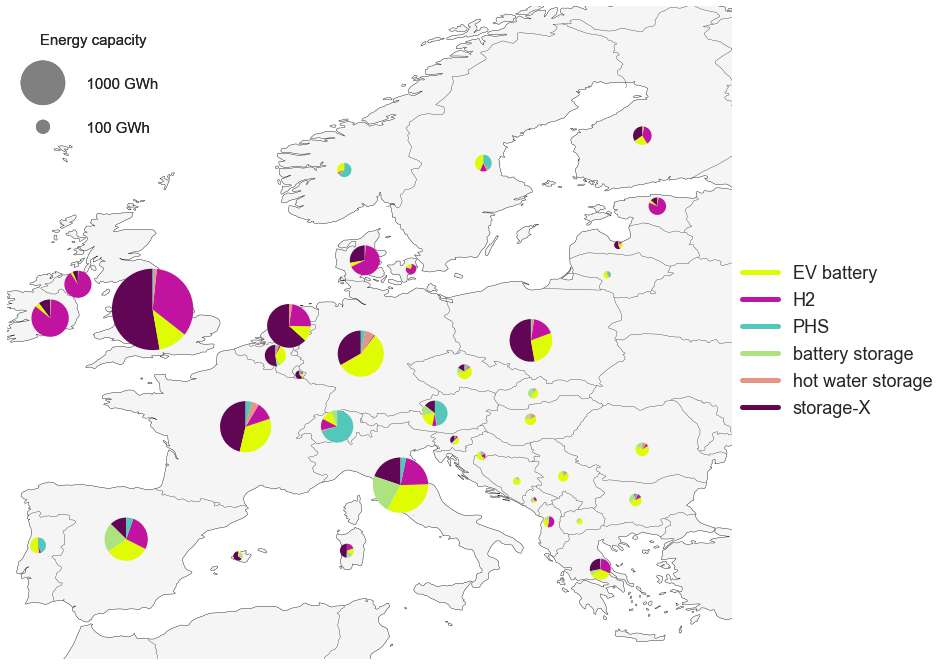

In [5]:
storage_map(networks_opt, 
            scen='-T-H-I-B', 
            tech_colors=tech_colors)

Import module that depicts the temporal variation of the electricity supply and consumption:

In [6]:
from scripts.Balancing_temporal_figures import temporal

To plot the temporal variation over a full year, we set 'moving_average = 8', corresponding to 24-hourly moving averaging since the resolution in the optimization is 3-hourly.

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth', 'nuclear',
       'transmission lines'],
      dtype='object')
No transmission lines
dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth', 'nuclear',
       'transmission lines'],
      dtype='object')
No transmission lines


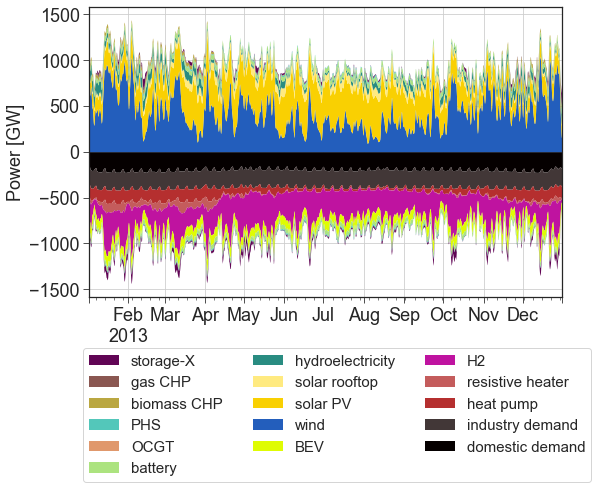

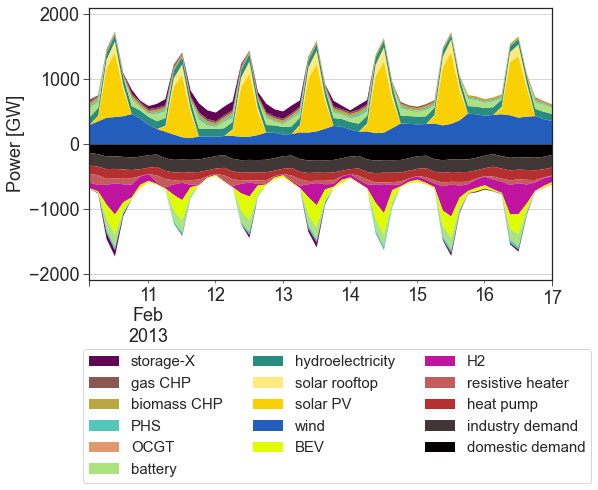

In [7]:
temporal(networks_opt, scen='-T-H-I-B', moving_average=8, tech_colors=tech_colors);

## Single-parametric sweep

The sensitivity of the output (choose between metrics such as 'E', 'lc', 'G_discharge', 'duration', and 'system_cost') to changing the storage parameters individually (i.e., single-parametric sweeep). This part is covered in section IV.A in the paper.

In [8]:
from scripts.Single_parameter_sweep_w_weather import single_parametric_sweep

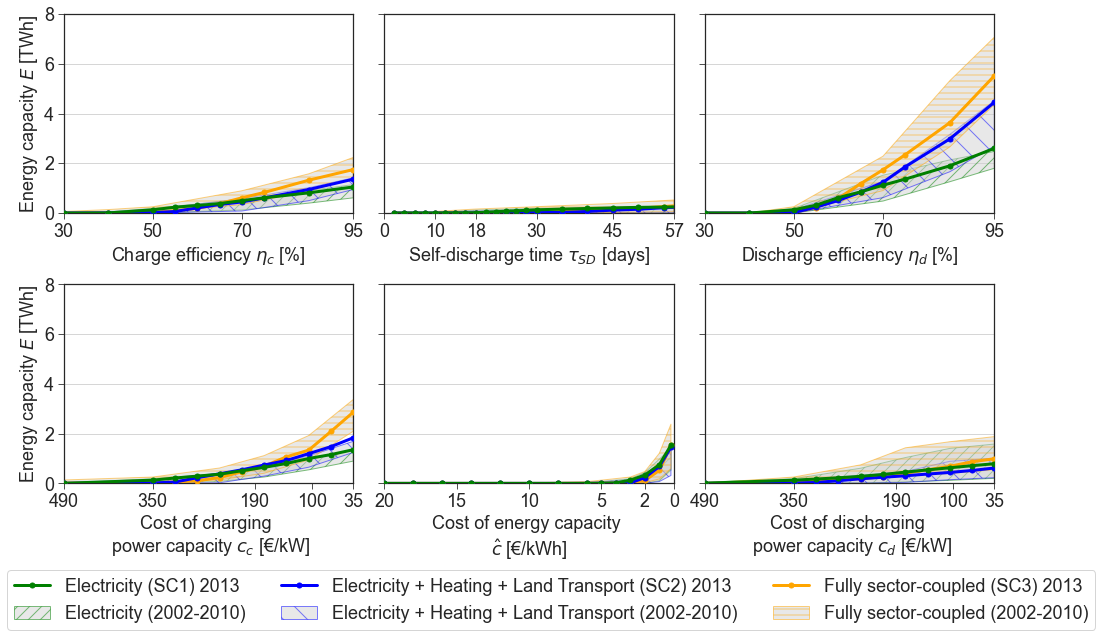

In [9]:
single_parametric_sweep(variable='E')

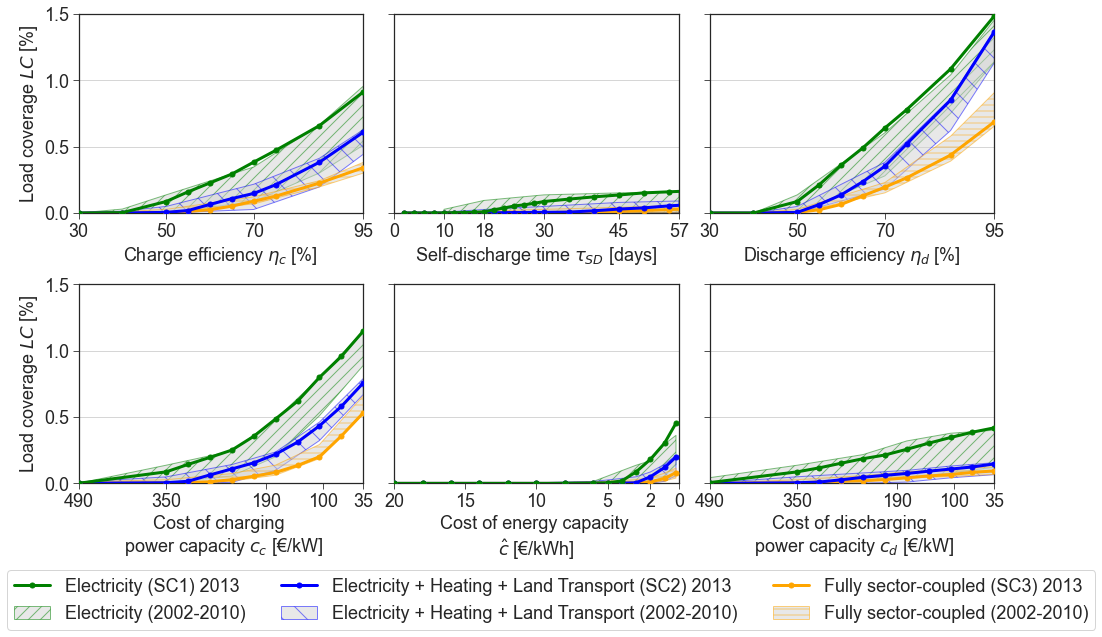

In [10]:
single_parametric_sweep(variable='lc')

## Spiderweb

Description 

Define lower threshold of energy capacity "threshold_E" for the storage configuration to be included. Emerging candidates can be included. Choose between:
- aCAES
- LAES
- TES
- PTES
- MSES
- RFB
- H2

In [11]:
from scripts.Spiderweb import plot_spiderweb

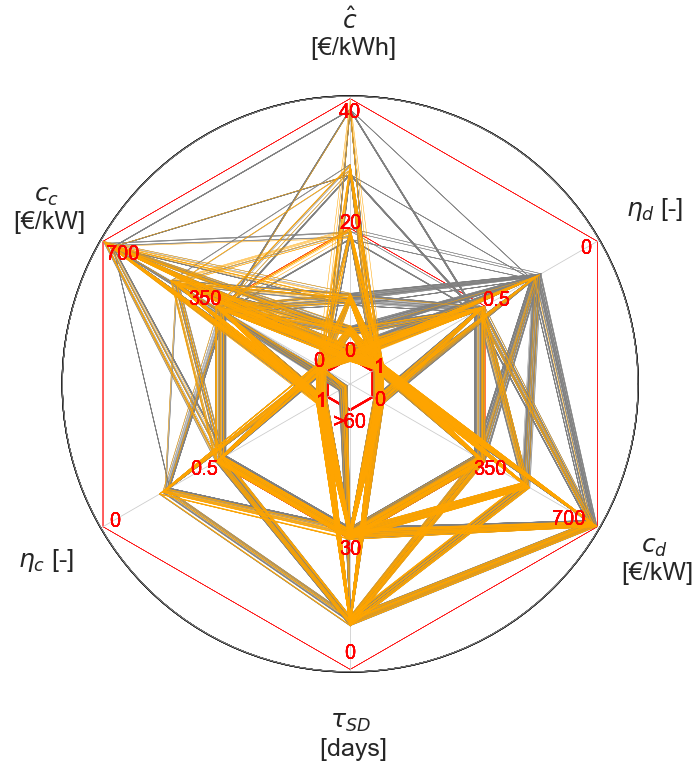

In [12]:
plot_spiderweb(scen = 'T-H-I-B', threshold_E = 2000, plot_ex = False) #, candidate = 'TES')

## Multivariable regression

Calculate the normalized coefficients by fitting a generalized linear regression model to the considering output metric. Here, demonstrated with the energy capacity "E".

- For load coverage, change the fitting variable to "LC"
- For system cost reduction, change this to "SCR"). 

In [13]:
from scripts.multivariable_regression import multivariable_regression

Sector:  
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     2784.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:46:26   Log-Likelihood:                 2452.1
No. Observations:                3888   AIC:                            -4890.
Df Residuals:                    3881   BIC:                            -4846.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6563      0.007    100.64

<Figure size 432x288 with 0 Axes>

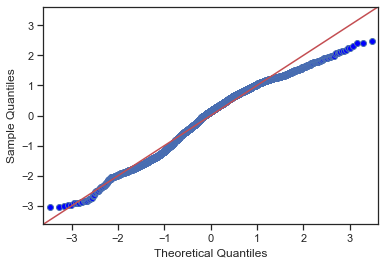

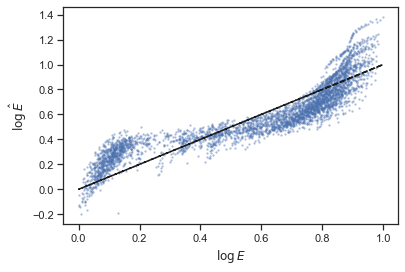

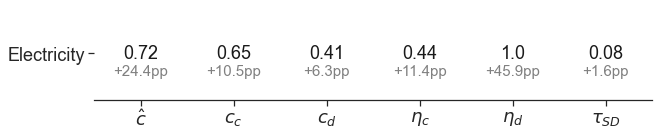

In [14]:
# Full regression model (including all six parameters as descriptors in the regression), using 3888 samples 
# (only available for the Electricity system)
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','c2','eta1','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         csv_file='sspace_3888.csv',
                         print_pvals=False, 
                         colors=False, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                  log_E   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     398.5
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.66e-224
Time:                        11:46:30   Log-Likelihood:                 541.71
No. Observations:                 724   AIC:                            -1069.
Df Residuals:                     717   BIC:                            -1037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4731      0.014   

<Figure size 432x288 with 0 Axes>

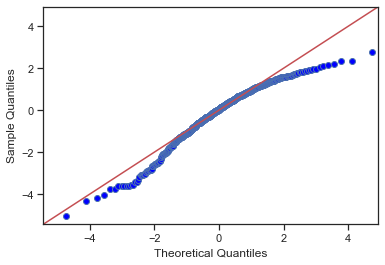

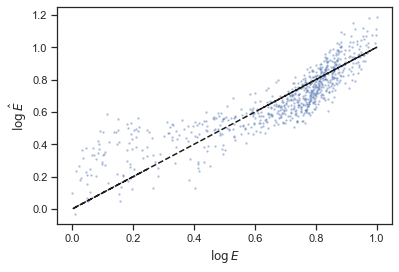

<Figure size 432x288 with 0 Axes>

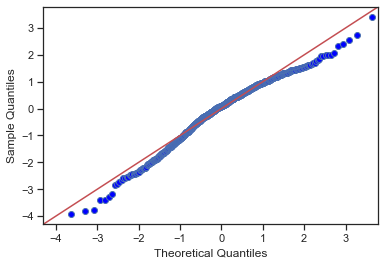

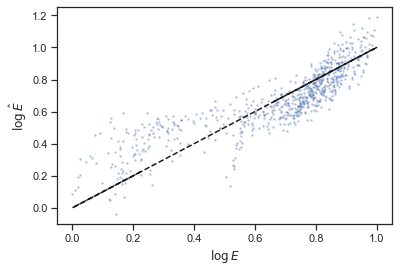

<Figure size 432x288 with 0 Axes>

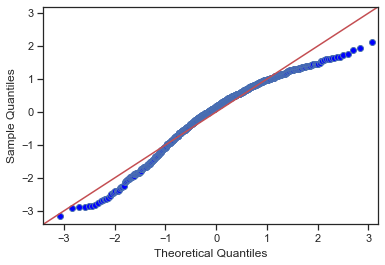

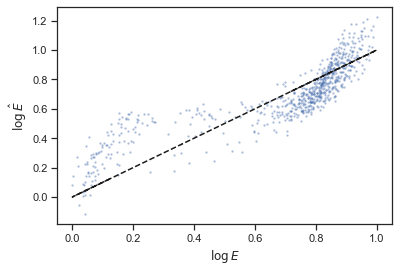

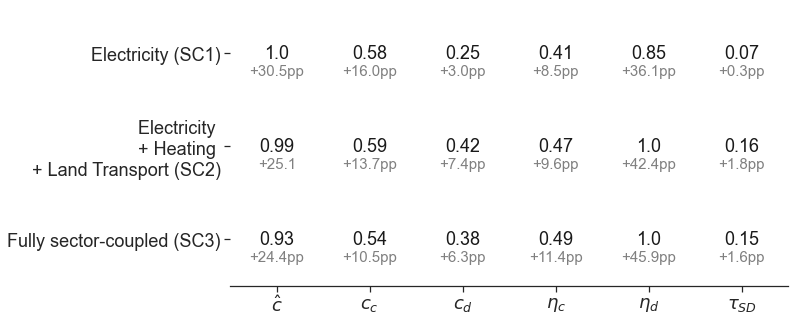

In [15]:
# Full regression model (including all six parameters as descriptors in the regression), using 724 samples
multivariable_regression(fitting='log_E', 
                         included_parameters = ['c_hat','c1','c2','eta1','eta2','tau_SD'],
                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
                                          # negligible storage deployment on European scale
                         csv_file='sspace_w_sectorcoupling_wo_duplicates.csv',
                         print_pvals=False, 
                         colors=False, 
                         scaling = True, # Whether descriptors and target variables are scaled 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
                        ); 

The commented code below is used to make a decomposition of the R2-adjusted metric. Every cell contains a reduced model with one parameter omitted from the regression. The difference in R2-adjusted compared to the full model indicates the level of variance in the output explained by the omitted parameter.

In [16]:
# Reduced regression model: Omitting 'tau_SD'
# multivariable_regression(fitting='log_E', 
#                         included_parameters = ['c_hat','c1','c2','eta1','eta2'],
#                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
#                                          # negligible storage deployment on European scale
#                         print_pvals=False, 
#                         colors=False, 
#                         scaling = True, # Whether descriptors and target variables are scaled 
#                                          #(if not, the coefficients are standardized)
#                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
#                        ); 

In [17]:
# Reduced regression model: Omitting 'eta2'
#multivariable_regression(fitting='log_E', 
#                         included_parameters = ['c_hat','c1','c2','eta1','tau_SD'],
#                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
#                                          # negligible storage deployment on European scale
#                         print_pvals=False, 
#                         colors=True, 
#                         scaling = True, # Whether descriptors and target variables are scaled 
#                                          #(if not, the coefficients are standardized)
#                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
#                        ); 

In [18]:
# Reduced regression model: Omitting 'eta1'
# multivariable_regression(fitting='log_E', 
#                         included_parameters = ['c_hat','c1','c2','eta2','tau_SD'],
#                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
#                                          # negligible storage deployment on European scale
#                         print_pvals=False, 
#                         colors=True, 
#                         scaling = True, # Whether descriptors and target variables are scaled 
#                                          #(if not, the coefficients are standardized)
#                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
#                        ); 

In [19]:
# Reduced regression model: Omitting 'c2'
# multivariable_regression(fitting='log_E', 
#                         included_parameters = ['c_hat','c1','eta1','eta2','tau_SD'],
#                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
#                                          # negligible storage deployment on European scale
#                         print_pvals=False, 
#                         colors=True, 
#                         scaling = True, # Whether descriptors and target variables are scaled 
#                                          #(if not, the coefficients are standardized)
#                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
#                        ); 

In [20]:
# Reduced regression model: Omitting 'c1'
# multivariable_regression(fitting='log_E', 
#                         included_parameters = ['c_hat','c2','eta1','eta2','tau_SD'],
#                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
#                                          # negligible storage deployment on European scale
#                         print_pvals=False, 
#                         colors=True, 
#                         scaling = True, # Whether descriptors and target variables are scaled 
#                                          #(if not, the coefficients are standardized)
#                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
#                        ); 

In [21]:
# Reduced regression model: Omitting 'c_hat'
#multivariable_regression(fitting='log_E', 
#                         included_parameters = ['c1','c2','eta1','eta2','tau_SD'],
#                         threshold_E = 0, # we omit storage with <1 GWh since they represent 
#                                          # negligible storage deployment on European scale
#                         print_pvals=False, 
#                         colors=True, 
#                         scaling = True, # Whether descriptors and target variables are scaled 
#                                          #(if not, the coefficients are standardized)
#                         keep_high_eta1s=False # Whether eta1 > 1 is included in the regression or not
#                        ); 

## Storage requirements matrix

In [22]:
from scripts.three_panel_figure_designspace_old import plot_2D_panels as plot_2D_panels_old

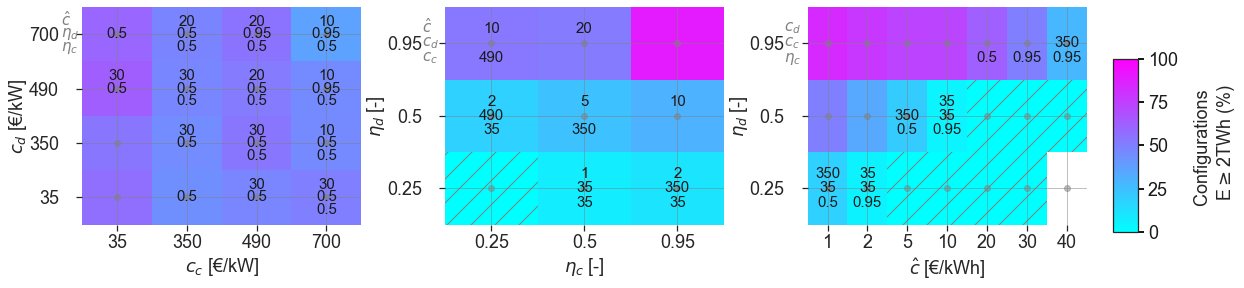

In [23]:
plot_2D_panels_old(sector='T-H-I-B', 
                   output = 'E_cor', # SCR
                   slack=100, 
                   threshold=2000, 
                   normfactor=100, 
                   color_variable='count_norm', 
                   combination=False, 
                   write_extra_indices=True, 
                   omit_charge_efficiency = True, 
                   lock_tau = False)

In [24]:
from scripts.three_panel_figure_designspace import plot_2D_panels

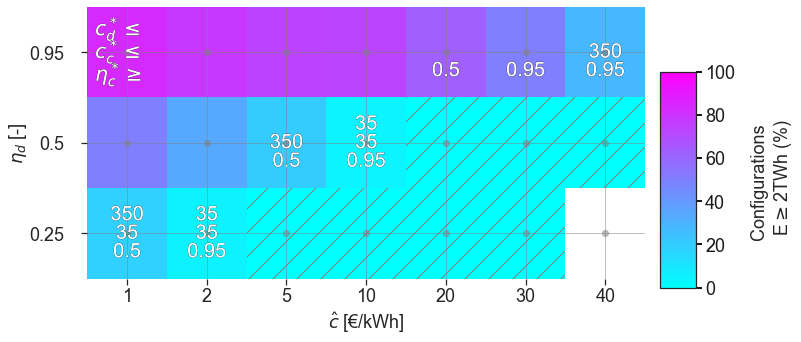

In [25]:
plot_2D_panels(sector='T-H-I-B', 
               slack=100, 
               threshold=2000, 
               normfactor=100, 
               color_variable='count_norm', 
               combination=False, 
               write_extra_indices=True, 
               omit_charge_efficiency = True, 
               lock_tau = False)

If the attribute 'omit_charge_efficiency = True', the charge efficiencies >1 are omitted. Otherwise (False), they are included.

## Existing techs

This section determines the model outputs when including the exact parameter values for the existing storage technologies. 

In [26]:
from scripts.read_ex_tech_nc_files import plot_existingtechs_result

Evaluating the output of the emerging storage technologies in PyPSA-Eur-Sec w. 37 nodes:

.csv file for N= 37  already exists
.csv file for N= 74  already exists


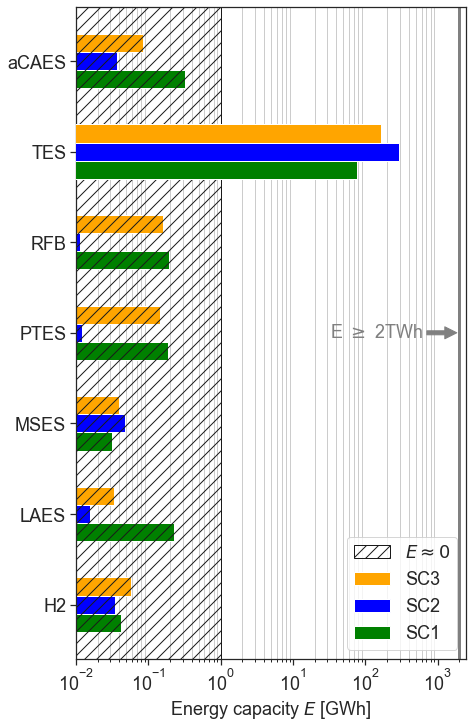

In [27]:
fig = plot_existingtechs_result(N_select='37', Ns=['37','74'])

Evaluating the output of the emerging storage technologies in PyPSA-Eur-Sec w. 74 nodes (change input settings to "N_select='74'") leads to a very similar result.

## Plot generation mix

This part of the code visualizes the backup power and battery capacity at different levels of storage-X deployments.

In [28]:
from scripts.Generation_mix import plot_generation_mix

Generation mix (dashed line indicates the 2 TWh threshold of storage-X to be considered in the optimal design space):

Sector: T-H-I-B
Wind: 56.3 pm 1.9
Solar: 34.2 pm 2.3
Hydro: 6.4 pm 0.1


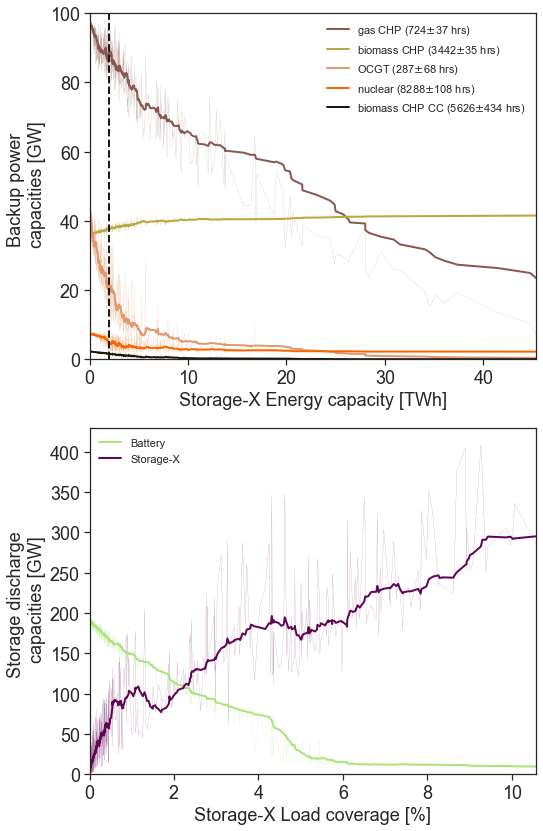

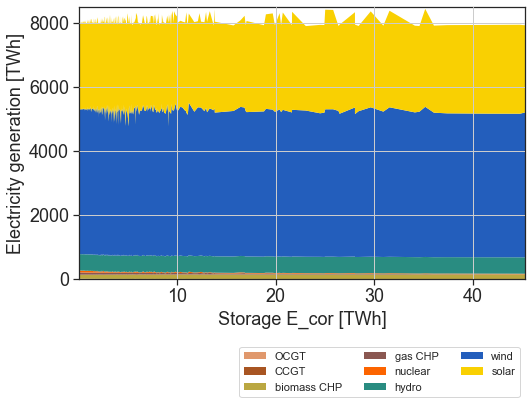

In [29]:
plot_generation_mix(tech_colors,sector='T-H-I-B')

## System cost reduction and renewable curtailment

This part investigates the total system cost and the level of renewable curtailment at different deployments of storage-X.

In [30]:
from scripts.Scatterplot import plot_scatter

Colored according to round-trip efficiency ('RTE'):

c_sys [bEUR]


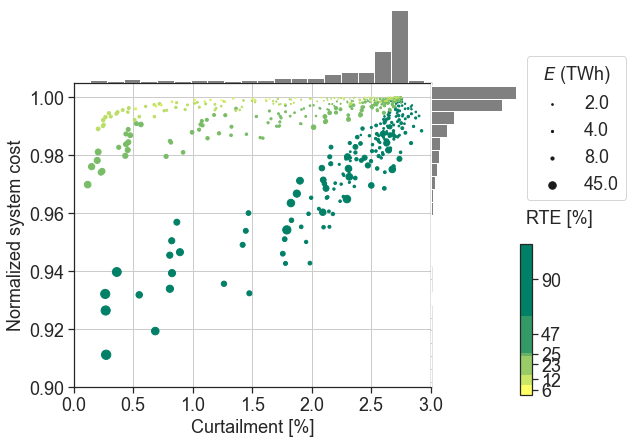

In [31]:
plot_scatter(sector='T-H-I-B',
             x='curtailment',
             y='c_sys [bEUR]',
             color_acc_to='RTE', 
             binwidth_factor = 0.05)

Colored according to charge capacity cost ('c_c'):

c_sys [bEUR]


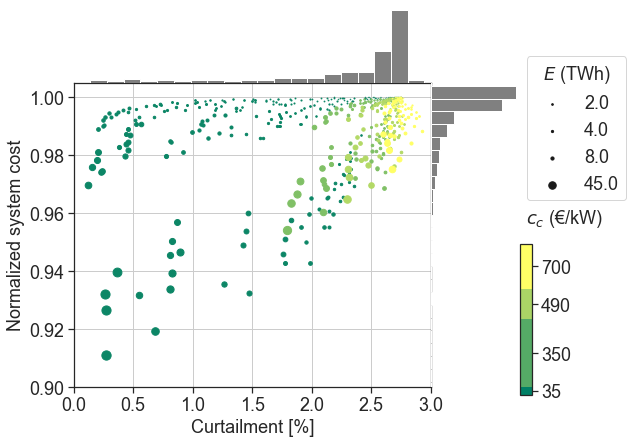

In [36]:
plot_scatter(sector='T-H-I-B',
             x='curtailment',
             y='c_sys [bEUR]',
             color_acc_to='c_c', 
             binwidth_factor = 0.05)